In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

from dicodile.utils.csc import reconstruct
from dicodile.utils.viz import display_dictionaries

from load_dict import load_dict_and_activations

In [33]:
data_dir_path = Path.home() / "data"
pattern_detection_path = data_dir_path / "pattern_detection_tokam"

In [104]:
experiment = "interchange_nodriftwave"
frame = 1000

input_dir_path = pattern_detection_path / "input" / experiment
input_file_path = input_dir_path / f"frame_{frame}.txt"

D_hat, z_hat = load_dict_and_activations(experiment, frame, verbose=1)

Loaded from: /home/mind/mbenbako/data/pattern_detection_tokam/learned_dictionaries/interchange_nodriftwave_frame_1000
Timestamp: 241021_143812


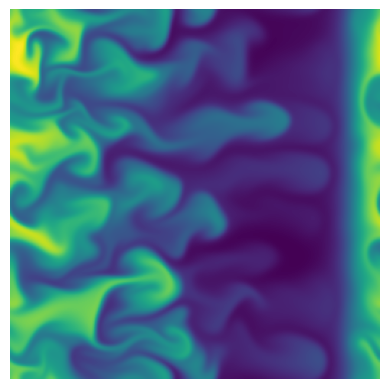

In [105]:
image_array = np.loadtxt(input_file_path)
plt.imshow(image_array)
plt.axis("off")
plt.show()

In [106]:
counts, values = np.histogram(image_array, bins=100)
mode = values[np.argmax(counts)]

mean_mask = image_array >= image_array.mean()
median_mask = image_array >= np.median(image_array)
mode_mask = image_array >= mode

In [107]:
# mask = mean_mask

# plt.imshow(mask, cmap="gray")
# plt.axis("off")
# plt.show()

# plt.imshow(image_array * mask, cmap="gray")
# plt.axis("off")
# plt.show()

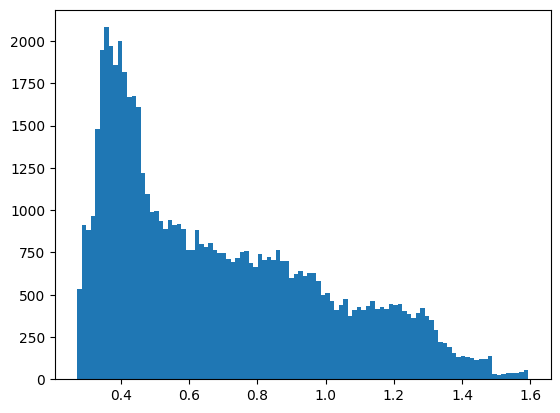

In [108]:
plt.hist(image_array.flatten(), bins=100)
plt.show()

In [109]:
n_atoms = len(D_hat)

In [110]:
# Dictionary shape: (n_atoms, n_channels, *atom_support)

print(D_hat.shape, D_hat.min(), D_hat.max())

(10, 1, 10, 10) 7.431683088667768e-15 0.2134282746152746


In [123]:
from pattern_detection_tokam.load_and_save import load_data

ModuleNotFoundError: No module named 'pattern_detection_tokam'

In [111]:
# Atoms sum to 1

print(np.sum(D_hat**2, axis=(1, 2, 3)))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


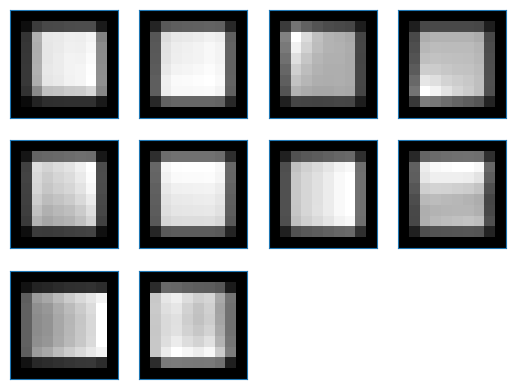

In [112]:
normalisation = np.reshape(np.max(D_hat, axis=(1, 2, 3)), (-1, 1, 1, 1))

display_dictionaries(D_hat / normalisation)
plt.show()

In [113]:
print(z_hat.shape, z_hat.min(), z_hat.max())

(10, 247, 247) 0.0 7.010193799272601


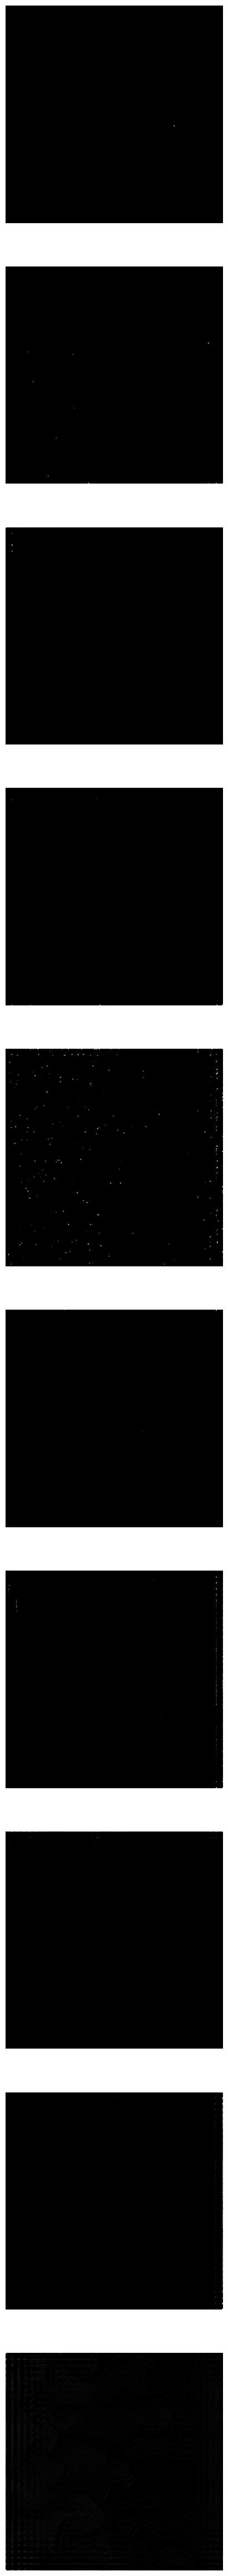

In [117]:
fig, axes = plt.subplots(n_atoms, 1, figsize=(6, 6 * n_atoms))

for ax, z in zip(axes, z_hat):
    ax.imshow(
        z / z.max(), cmap="gray"
    )
    ax.axis("off")
fig.show()

In [118]:
X_hat = reconstruct(z_hat, D_hat)
X_hat = np.clip(X_hat, 0, 1)
X_hat = X_hat.transpose([1, 2, 0])

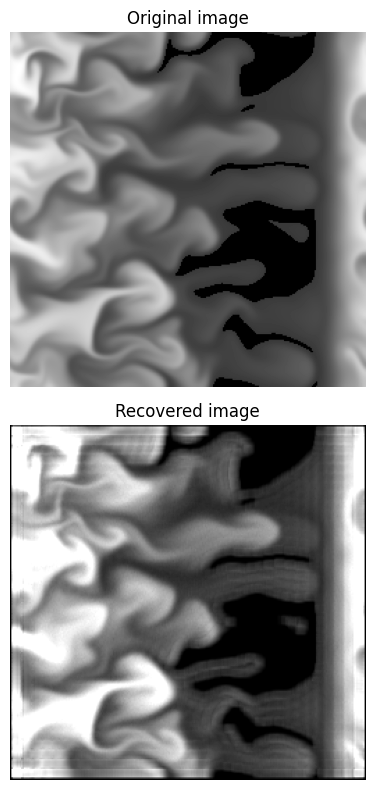

In [119]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=[6.4, 8])

ax1.imshow(image_array * mode_mask, cmap='gray')
ax1.set_title('Original image')
ax1.axis('off')

ax2.imshow(X_hat, cmap='gray')
ax2.set_title('Recovered image')
ax2.axis('off')
plt.tight_layout()

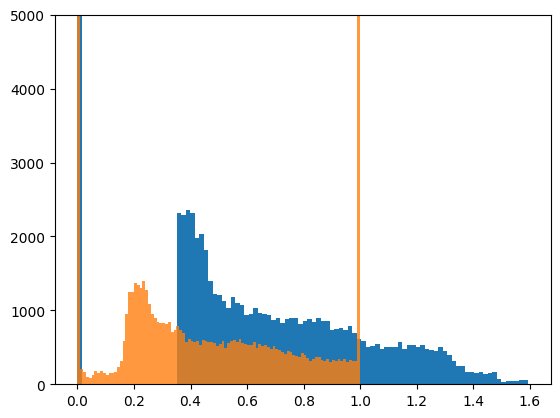

In [122]:
counts, values = np.histogram(image_array, bins=100)
mode = values[np.argmax(counts)]

plt.hist((image_array * mode_mask).flatten(), bins=100)
plt.hist(X_hat.flatten(), bins=100, alpha=0.8)
#plt.hist((X_hat + np.mean(image_array))[X_hat > 0].flatten(), bins=100)
#plt.axvline(image_array.mean(), color="k")
#plt.axvline(np.median(image_array), color="tab:red")
#plt.axvline(mode, color="tab:pink")
plt.ylim([0, 5000])

plt.show()